**Nama : Risma Amaliyah Mahmudah**

**NIM  : 1301204087**
  
**Kelas : IF-44-08**

# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline

# **Load Data**

In [ ]:
data = pd.read_excel('https://github.com/rismaamaliyah/Case-Based-2/blob/main/water-treatment.xlsx?raw=true')
data.head()

,0,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,...,COND_S,RD_DBO_P,RD_SS_P,RD_SED_P,RD_DBO_S,RD_DQO_S,RD_DBO_G,RD_DQO_G,RD_SS_G,RD_SED_G
0,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5


In [ ]:
data = data.drop(columns=[0])
data.head()

,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,PH_P,...,COND_S,RD_DBO_P,RD_SS_P,RD_SED_P,RD_DBO_S,RD_DQO_S,RD_DBO_G,RD_DQO_G,RD_SS_G,RD_SED_G
0,44101,1.50,7.8,?,407,166,66.3,4.5,2110,7.9,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,39024,3.00,7.7,?,443,214,69.2,6.5,2660,7.7,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,32229,5.00,7.6,?,528,186,69.9,3.4,1666,7.7,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,35023,3.50,7.9,205,588,192,65.6,4.5,2430,7.8,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,36924,1.50,8.0,242,496,176,64.8,4.0,2110,7.9,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q_E       527 non-null    object 
 1   ZN_E      527 non-null    object 
 2   PH_E      527 non-null    float64
 3   DBO_E     527 non-null    object 
 4   DQO_E     527 non-null    object 
 5   SS_E      527 non-null    object 
 6   SSV_E     527 non-null    object 
 7   SED_E     527 non-null    object 
 8   COND_E    527 non-null    int64  
 9   PH_P      527 non-null    float64
 10  DBO_P     527 non-null    object 
 11  SS_P      527 non-null    int64  
 12  SSV_P     527 non-null    object 
 13  SED_P     527 non-null    object 
 14  COND_P    527 non-null    int64  
 15  PH_D      527 non-null    float64
 16  DBO_D     527 non-null    object 
 17  DQO_D     527 non-null    object 
 18  SS_D      527 non-null    object 
 19  SSV_D     527 non-null    object 
 20  SED_D     527 non-null    object

In [ ]:
data.describe()

,PH_E,COND_E,PH_P,SS_P,COND_P,PH_D,COND_D
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,7.810057,1478.620493,7.829981,253.952562,1496.034156,7.811954,1490.569260
std,0.246175,394.898019,0.226925,147.458468,402.588656,0.199594,399.990816
min,6.900000,651.000000,7.300000,104.000000,646.000000,7.100000,85.000000
25%,7.600000,1201.000000,7.700000,184.000000,1217.000000,7.700000,1225.500000
50%,7.800000,1406.000000,7.800000,220.000000,1420.000000,7.800000,1428.000000
75%,8.000000,1672.000000,8.000000,272.000000,1713.500000,7.900000,1701.000000
max,8.700000,3230.000000,8.500000,1692.000000,3170.000000,8.400000,3690.000000


In [ ]:
print("Dimensi data: ", data.shape)

Dimensi data:  (527, 38)


# **Pre-processing**

In [ ]:
data = data.replace('?', np.nan)

In [ ]:
data = data.apply(pd.to_numeric)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q_E       509 non-null    float64
 1   ZN_E      524 non-null    float64
 2   PH_E      527 non-null    float64
 3   DBO_E     504 non-null    float64
 4   DQO_E     521 non-null    float64
 5   SS_E      526 non-null    float64
 6   SSV_E     516 non-null    float64
 7   SED_E     502 non-null    float64
 8   COND_E    527 non-null    int64  
 9   PH_P      527 non-null    float64
 10  DBO_P     487 non-null    float64
 11  SS_P      527 non-null    int64  
 12  SSV_P     516 non-null    float64
 13  SED_P     503 non-null    float64
 14  COND_P    527 non-null    int64  
 15  PH_D      527 non-null    float64
 16  DBO_D     499 non-null    float64
 17  DQO_D     518 non-null    float64
 18  SS_D      525 non-null    float64
 19  SSV_D     514 non-null    float64
 20  SED_D     502 non-null    float6

In [ ]:
data.isnull().sum()

Q_E         18
ZN_E         3
PH_E         0
DBO_E       23
DQO_E        6
SS_E         1
SSV_E       11
SED_E       25
COND_E       0
PH_P         0
DBO_P       40
SS_P         0
SSV_P       11
SED_P       24
COND_P       0
PH_D         0
DBO_D       28
DQO_D        9
SS_D         2
SSV_D       13
SED_D       25
COND_D       0
PH_S         1
DBO_S       23
DQO_S       18
SS_S         5
SSV_S       17
SED_S       28
COND_S       1
RD_DBO_P    62
RD_SS_P      4
RD_SED_P    27
RD_DBO_S    40
RD_DQO_S    26
RD_DBO_G    36
RD_DQO_G    25
RD_SS_G      8
RD_SED_G    31
dtype: int64

In [ ]:
data = data.fillna(data.median())

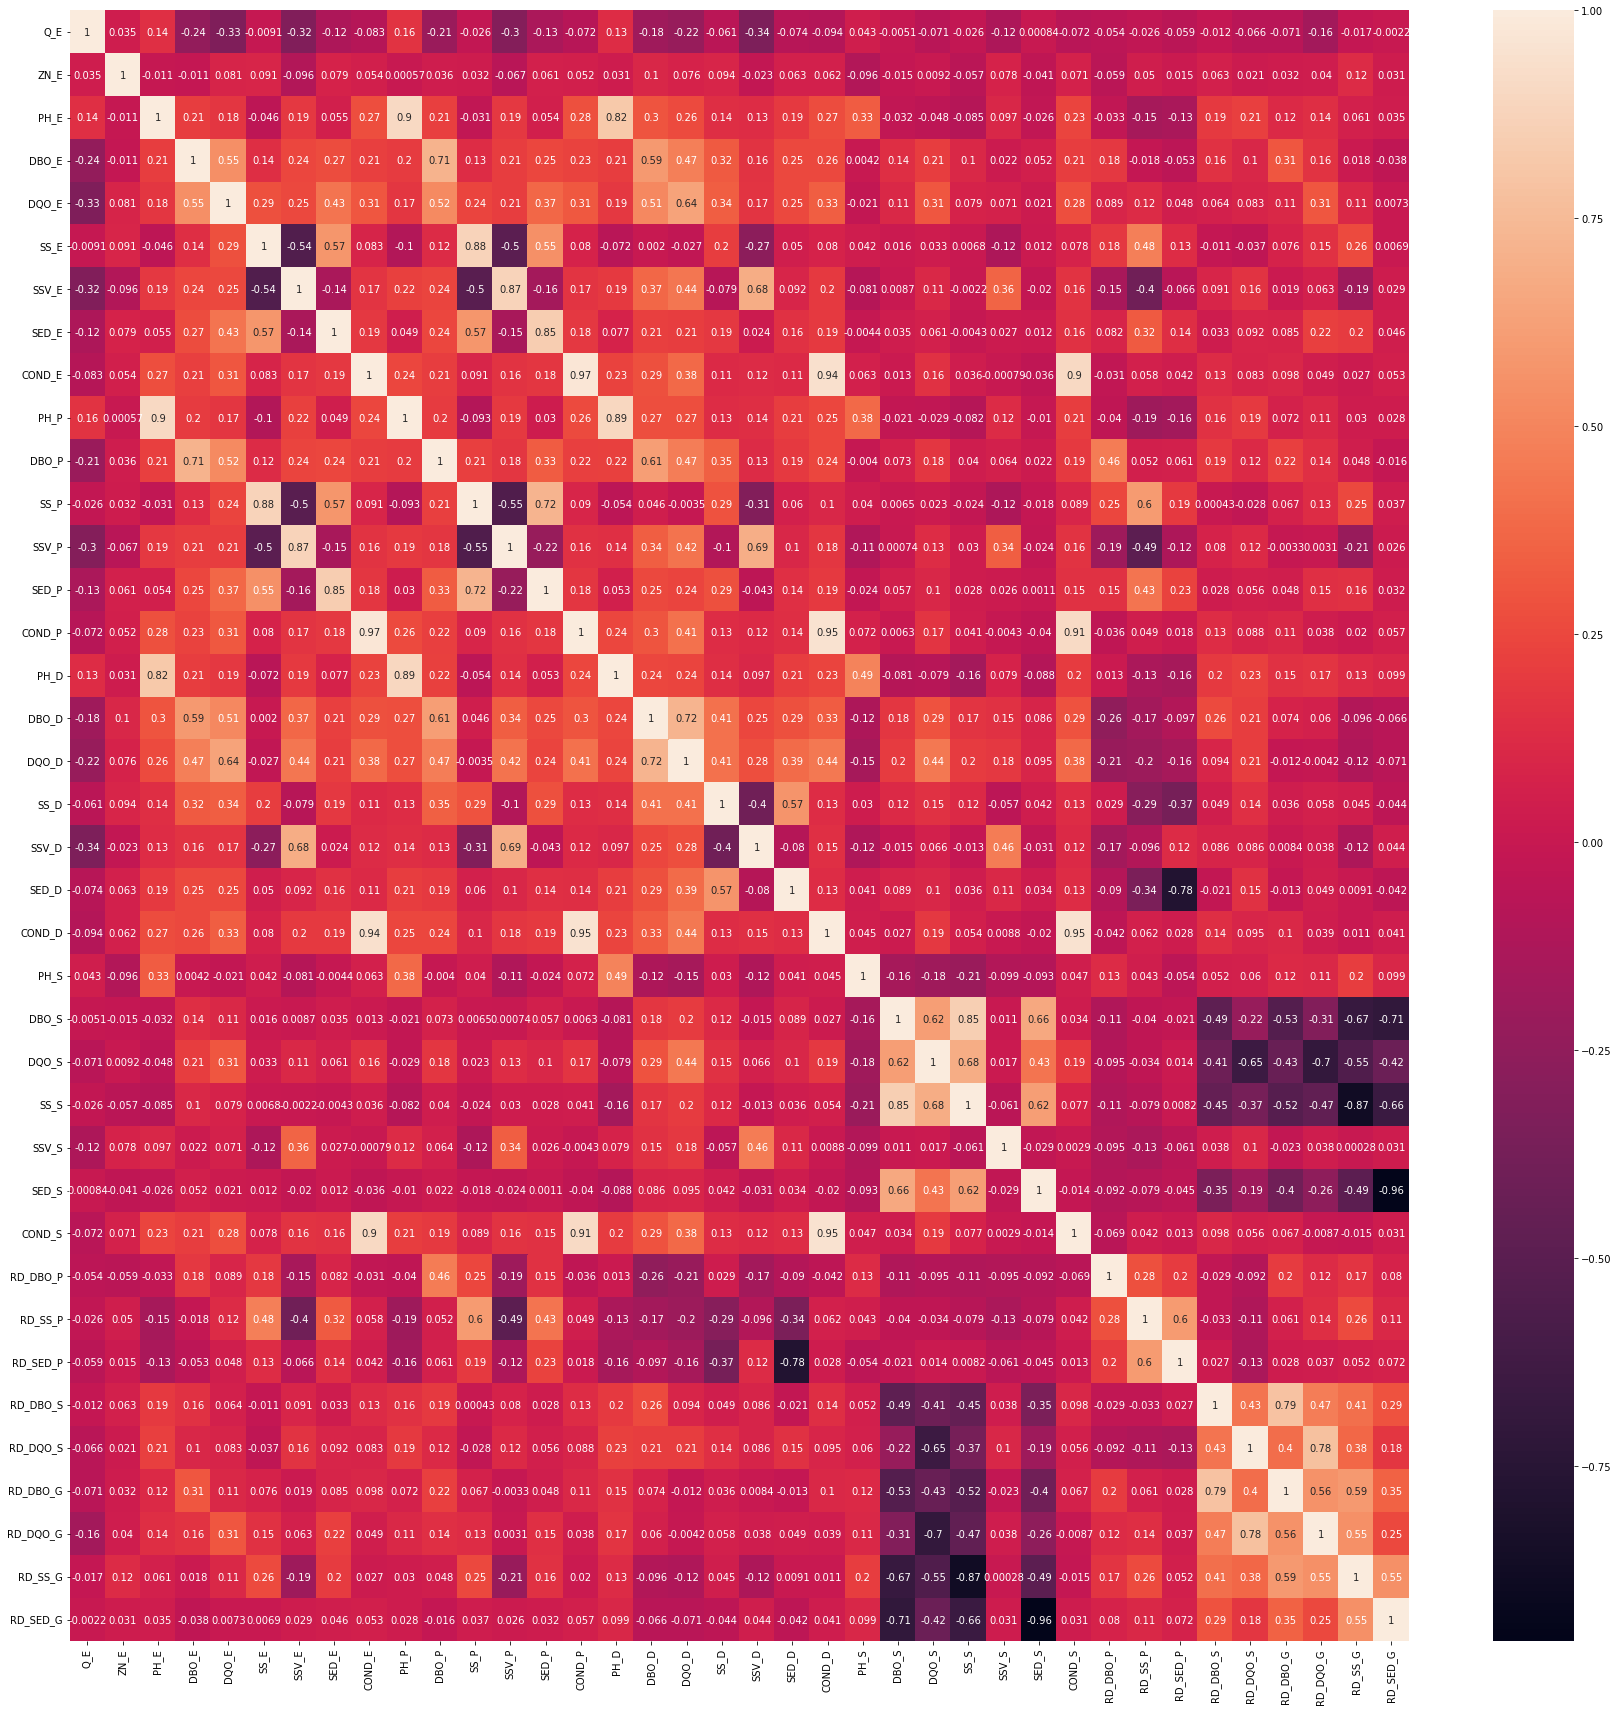

In [ ]:
# Visualisasi hasil dari korelasi
corr = data.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr,annot=True)

<ipython-input-62-0cf1606fa4cd>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-62-0cf1606fa4cd>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-62-0cf1606fa4cd>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-62-0cf1606fa4cd>:2: RuntimeW

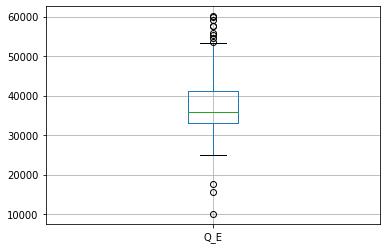

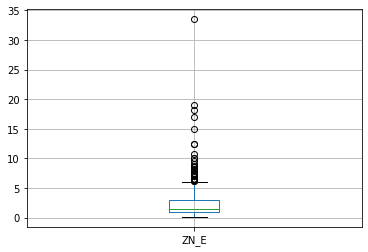

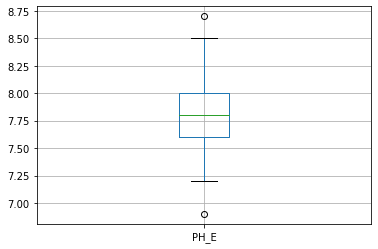

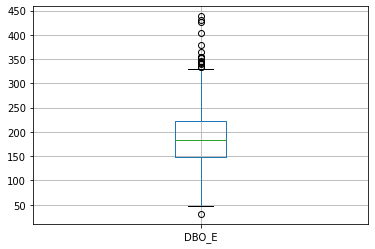

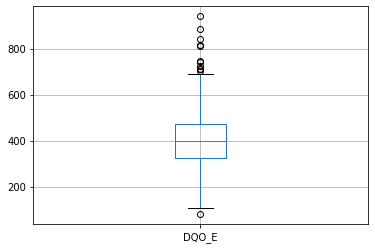

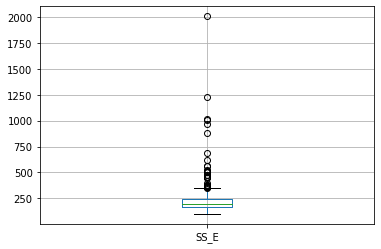

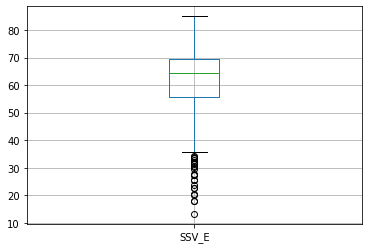

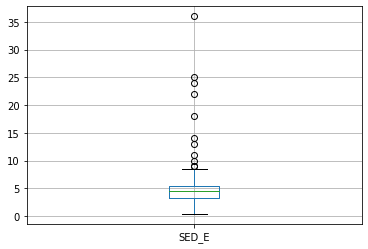

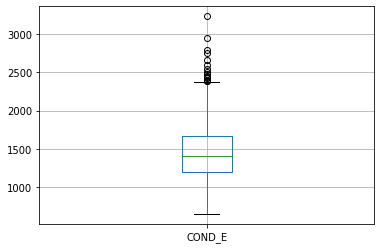

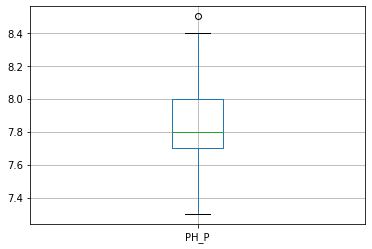

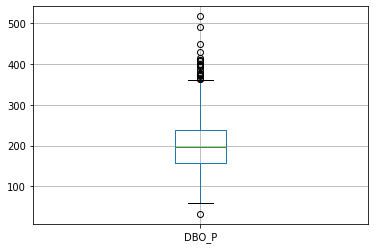

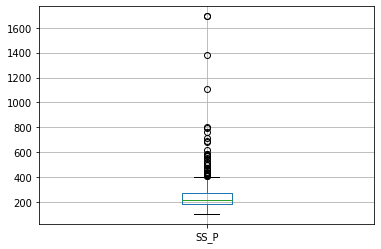

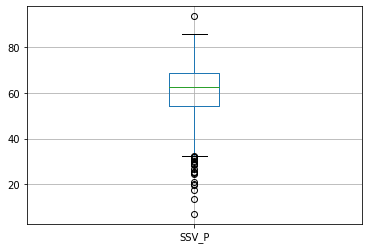

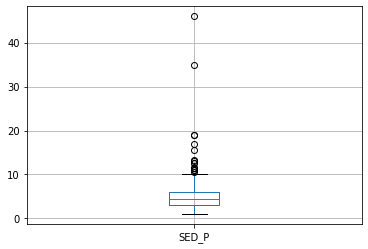

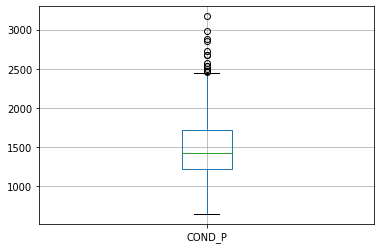

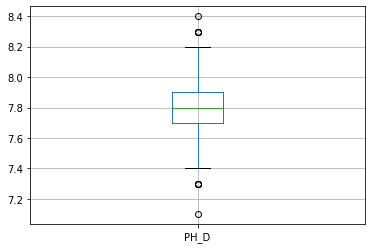

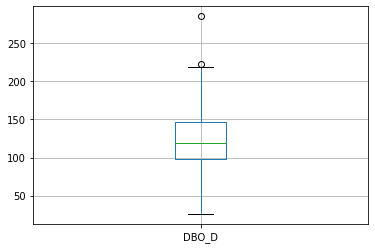

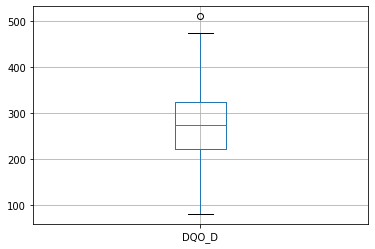

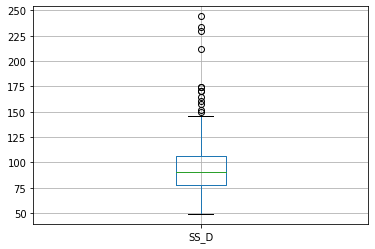

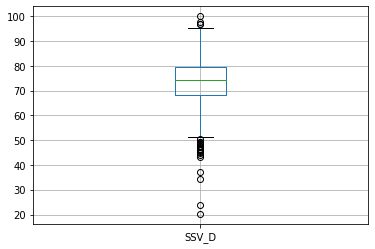

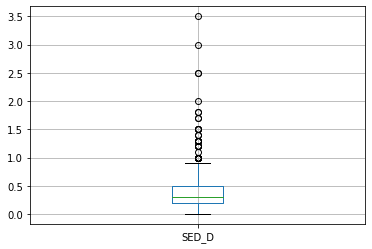

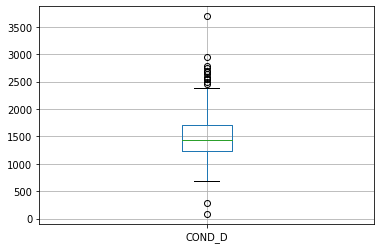

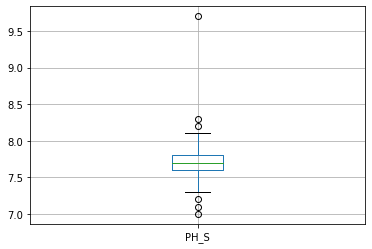

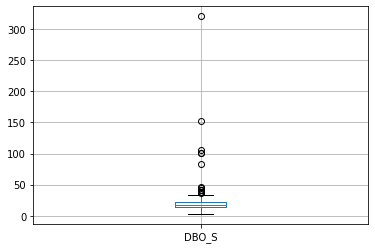

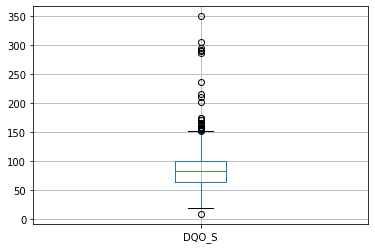

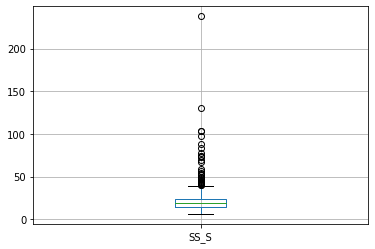

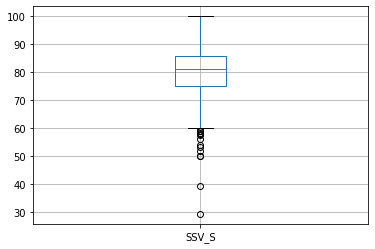

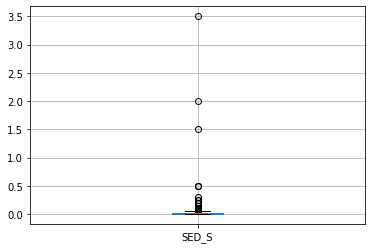

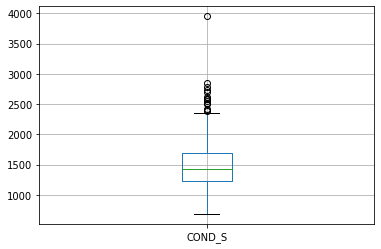

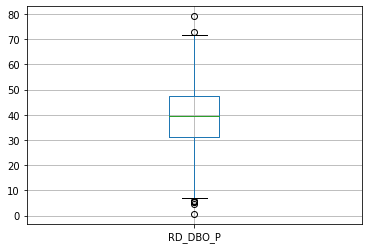

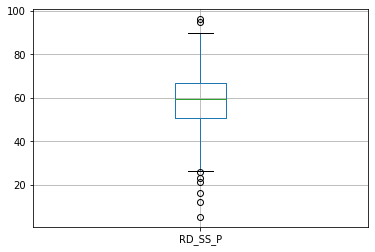

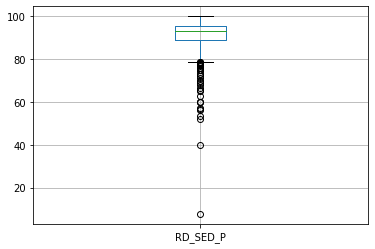

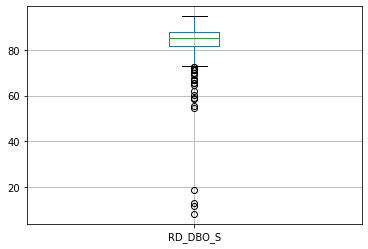

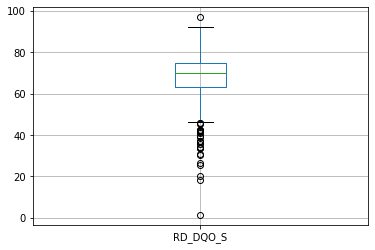

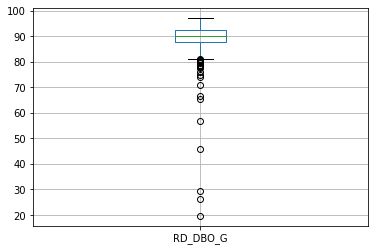

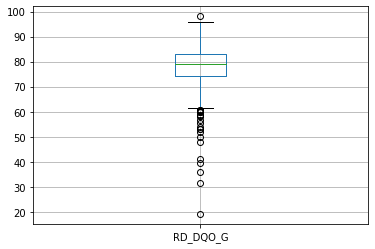

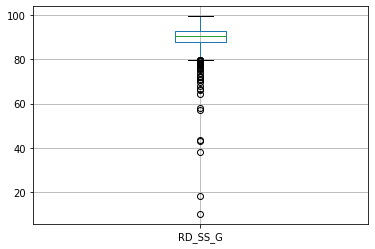

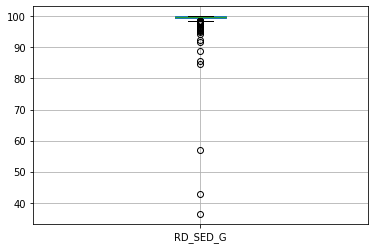

In [ ]:
for column in data:
    plt.figure()
    data.boxplot([column])

In [ ]:
def outliers_handling(data, columns):
  for column in columns:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)

    iqr = q3 - q1

    upper_whisker = q3 + (1.5 * iqr)
    lower_whisker = q1 - (1.5 * iqr)

    data[column] = np.where(data[column]>upper_whisker, upper_whisker,
                            np.where(data[column]<lower_whisker, lower_whisker,
                                     data[column]))

In [ ]:
outliers_handling(data, data.columns)

# **Scaling**

In [ ]:
scaler = StandardScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)

In [ ]:
x = data_scaled

In [ ]:
x

array([[ 1.11811461, -0.36210619, -0.04111142, ...,  0.14934245,
        -0.54134846,  0.00608342],
       [ 0.30076484,  0.52399132, -0.44989853, ...,  0.16317191,
         0.49102748,  0.8610062 ],
       [-0.79316695,  1.70545467, -0.85868564, ..., -0.34851819,
        -0.24023881, -2.34495423],
       ...,
       [-0.6816004 , -1.07098419, -1.67625987, ..., -0.16873518,
        -0.19722315, -1.27630075],
       [-0.79944559, -1.07098419, -2.08504698, ...,  1.20038158,
        -0.06817615,  0.43354481],
       [-1.07345175, -1.12415004, -1.26747276, ...,  0.46742008,
        -0.73491895,  0.21981411]])

# **Reduksi Dimensi**

In [ ]:
pca = PCA(n_components=2)
fit_pca = pca.fit_transform(x)
pca_data = pd.DataFrame(data = fit_pca, columns = ['PCA_1', 'PCA_2'])
pca_data.head()

,PCA_1,PCA_2
0,1.611241,-0.843757
1,4.089042,0.074447
2,0.658220,-1.838838
3,4.181095,0.031124
4,2.378687,-0.253166


# **Elbow Method**

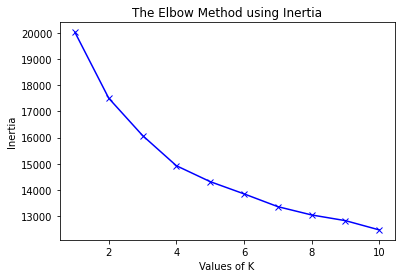

In [ ]:
K = range(1, 11)
inertias = []

for i in K:
  kmeanModel = KMeans(n_clusters=i).fit(x)
  kmeanModel.fit(x)
  inertias.append(kmeanModel.inertia_)

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [ ]:
"""
km = KMeans(n_clusters=4)
km
"""

'\nkm = KMeans(n_clusters=4)\nkm\n'

In [ ]:
"""
data1 = pca_data[pca_data.cluster==0]
data2 = pca_data[pca_data.cluster==1]
data3 = pca_data[pca_data.cluster==2]
data4 = pca_data[pca_data.cluster==3]

plt.scatter(data1.PCA_1,data1['PCA_2'],color='green')
plt.scatter(data2.PCA_1,data2['PCA_2'],color='red')
plt.scatter(data3.PCA_1,data3['PCA_2'],color='black')
plt.scatter(data4.PCA_1,data4['PCA_2'],color='yellow')
"""

"\ndata1 = pca_data[pca_data.cluster==0]\ndata2 = pca_data[pca_data.cluster==1]\ndata3 = pca_data[pca_data.cluster==2]\ndata4 = pca_data[pca_data.cluster==3]\n\nplt.scatter(data1.PCA_1,data1['PCA_2'],color='green')\nplt.scatter(data2.PCA_1,data2['PCA_2'],color='red')\nplt.scatter(data3.PCA_1,data3['PCA_2'],color='black')\nplt.scatter(data4.PCA_1,data4['PCA_2'],color='yellow')\n"

In [ ]:
"""
y_predicted = km.fit_predict(pca_data[['PCA_1', 'PCA_2']])
y_predicted

pca_data['cluster'] = y_predicted
pca_data
"""

"\ny_predicted = km.fit_predict(pca_data[['PCA_1', 'PCA_2']])\ny_predicted\n\npca_data['cluster'] = y_predicted\npca_data\n"

In [ ]:

np.random.seed(42)

def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

class KMeans:
  def __init__(self, K=5, max_iters=100, plot_steps=False):
    self.K= K
    self.max_iters = max_iters
    self.plot_steps = plot_steps

    self.clusters = [[] for _ in range(self.K)]

    self.centroids = []

  def predict(self, X):
    self.X = X
    self.n_samples, self.n_features = X.shape

    random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
    self.centroids = [self.X[idx] for idx in random_sample_idxs]

    # optimization
    for _ in range(self.max_iters):
      # update clusters
      self.clusters = self._create_clusters(self.centroids)
      # update centroids
      centroids_old = self.centroids
      self.centroids = self._get_centroids(self.clusters)
      if self.plot_steps:
        self.plot()
      # check if converged
      if self._is_converged(centroids_old, self.centroids):
        break
    # return clusters
    return self._get_cluster_labels(self.clusters)

  def _get_cluster_labels(self, clusters):
    labels = np.empty(self.n_samples)
    for cluster_idx, cluster in enumerate(clusters):
      for sample_idx in cluster:
        labels[sample_idx] = cluster_idx
    return labels

  def _create_clusters(self, centroids):
    clusters = [[] for _ in range(self.K)]
    for idx, sample in enumerate(self.X):
      centroid_idx = self._closest_centroid(sample, centroids)
      clusters[centroid_idx].append(idx)
    return clusters

  def _closest_centroid(self, sample, centroids):
    distances = [euclidean_distance(sample, point) for point in centroids]
    closest_idx = np.argmin(distances)
    return closest_idx

  def _get_centroids(self, clusters):
    centroids = np.zeros((self.K, self.n_features))
    for cluster_idx, cluster in enumerate(clusters):
      cluster_mean = np.mean(self.X[cluster], axis=0)
      centroids[cluster_idx] = cluster_mean
    return centroids

  def _is_converged(self, centroids_old, centroids):
    distance = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
    return sum(distance) == 0

  def plot(self):
    fig, ax = plt.subplots(figsize=(12,8))

    for i, index in enumerate(self.clusters):
      point = self.X[index].T
      ax.scatter(*point)

    for point in self.centroids:
      ax.scatter(*point, marker="x", color="black", linewidth=2)

    plt.show()

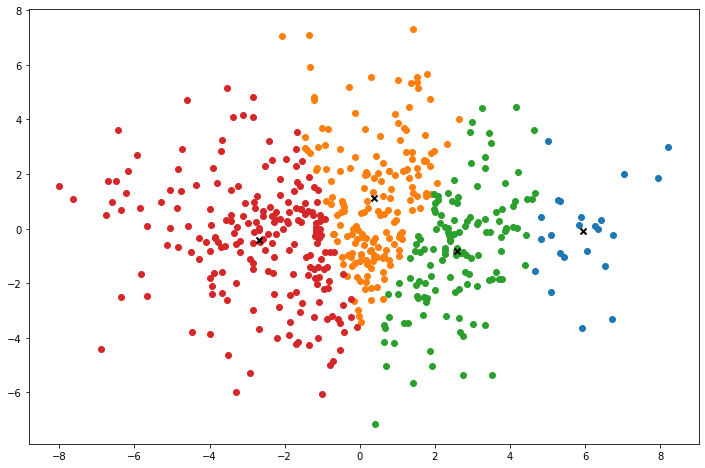

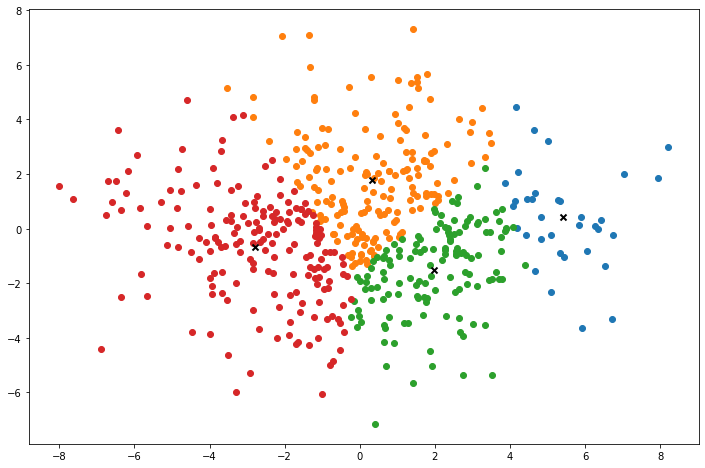

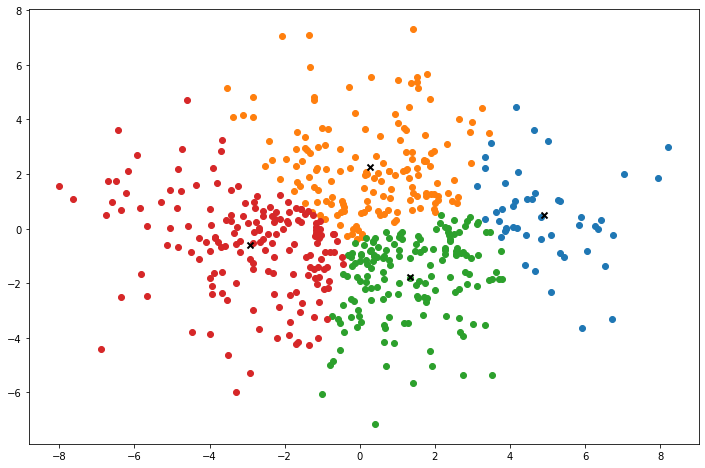

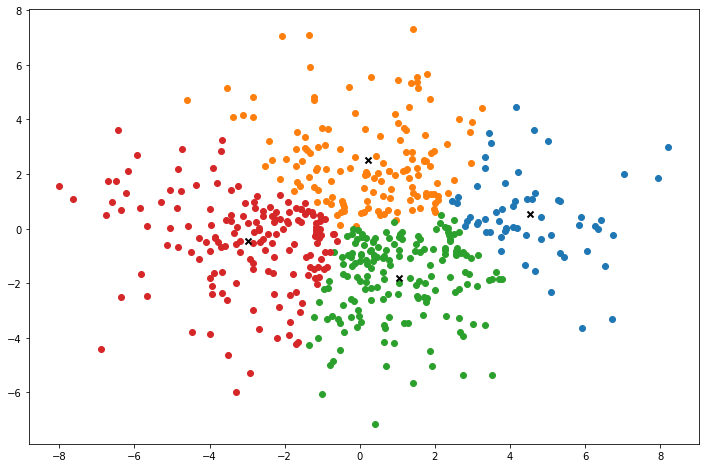

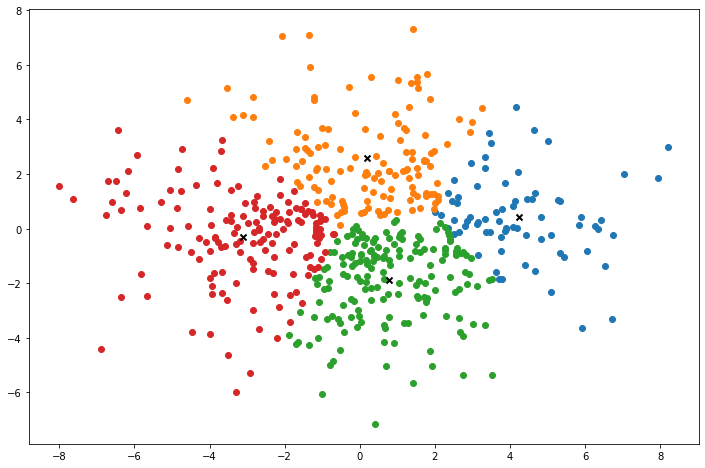

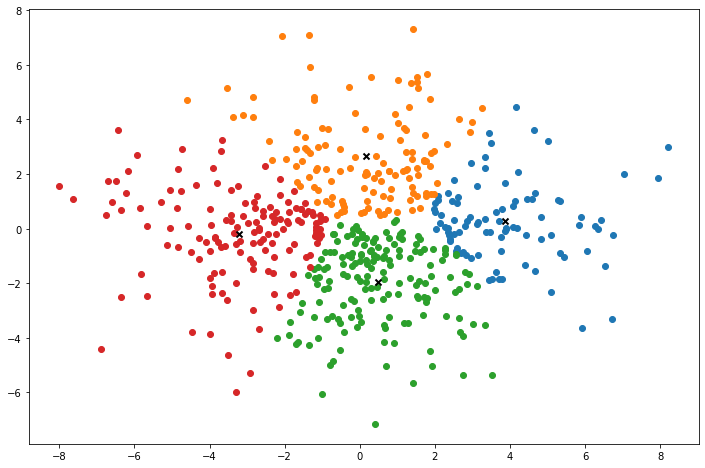

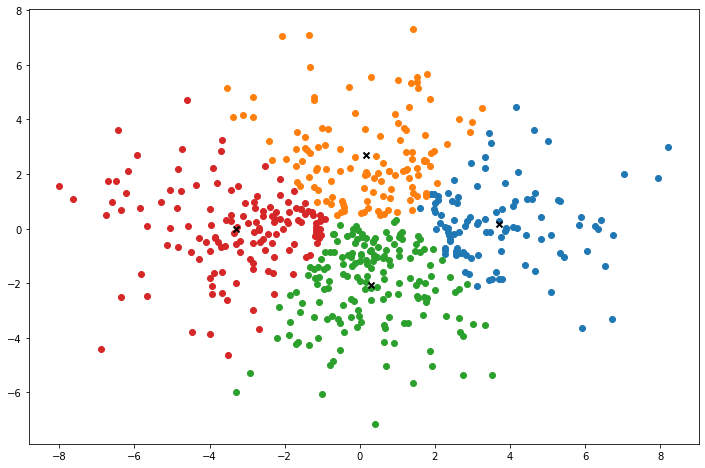

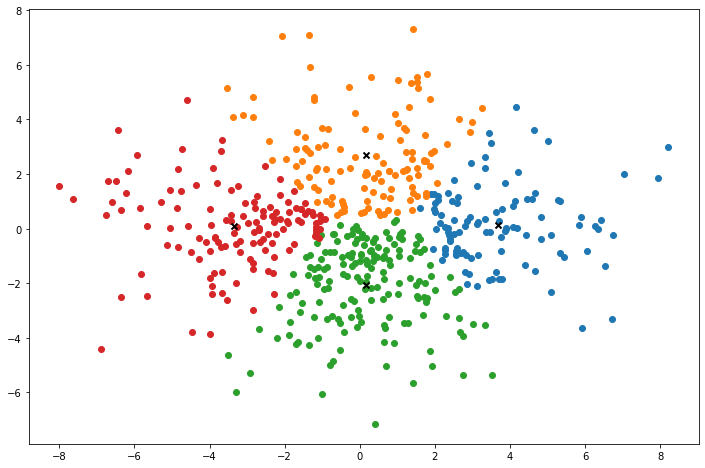

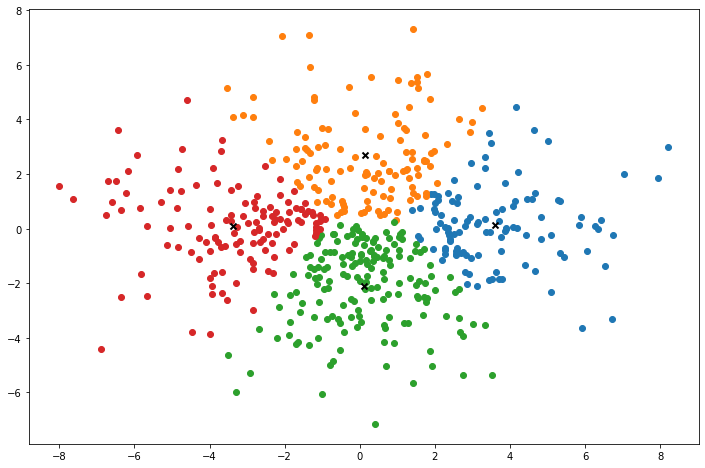

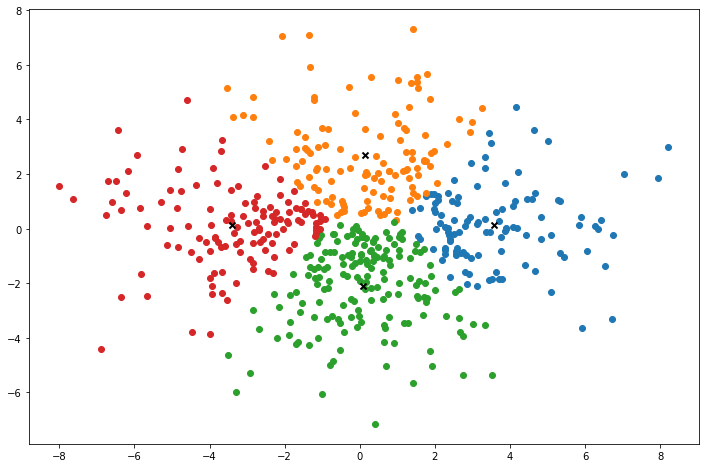

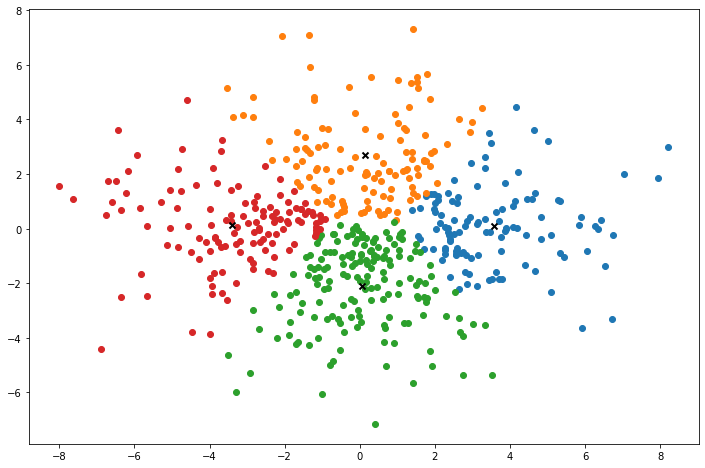

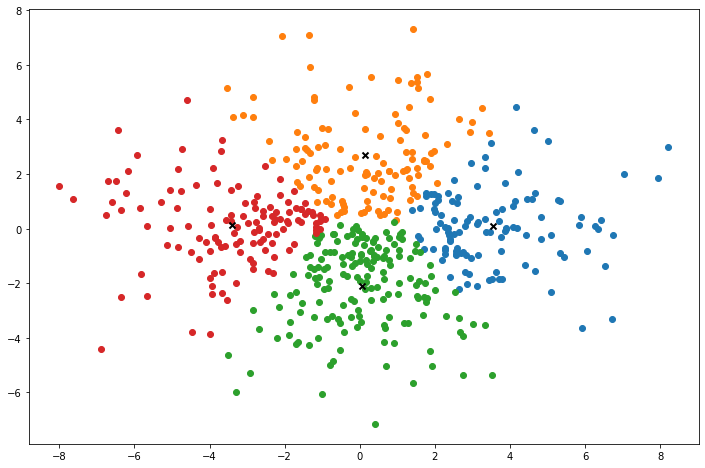

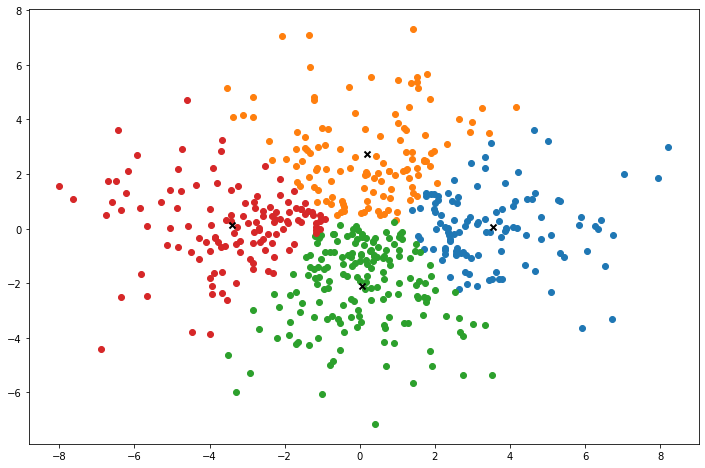

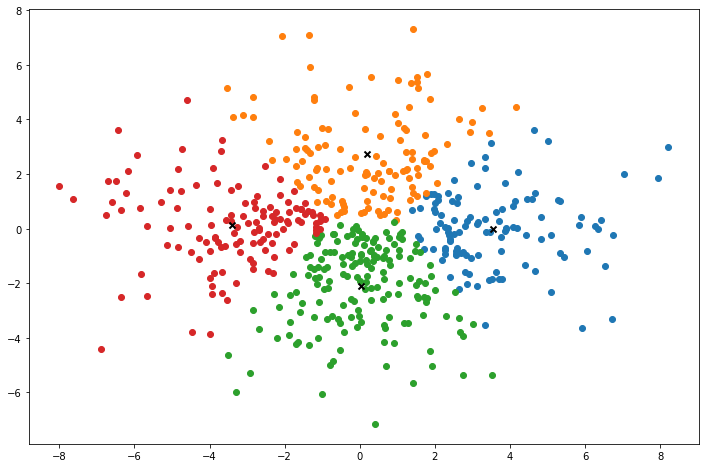

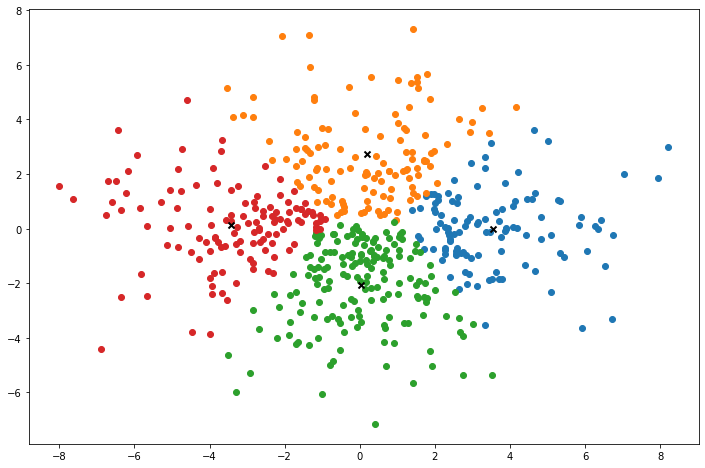

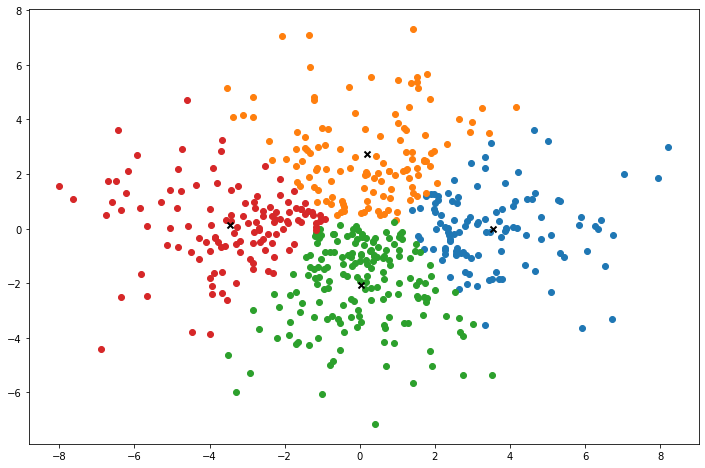

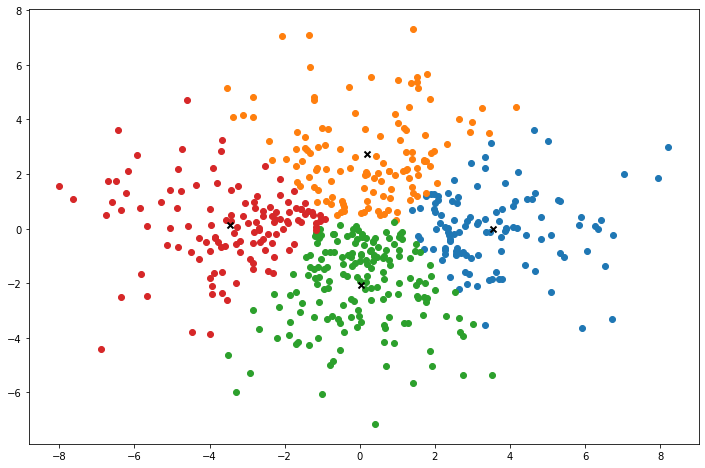

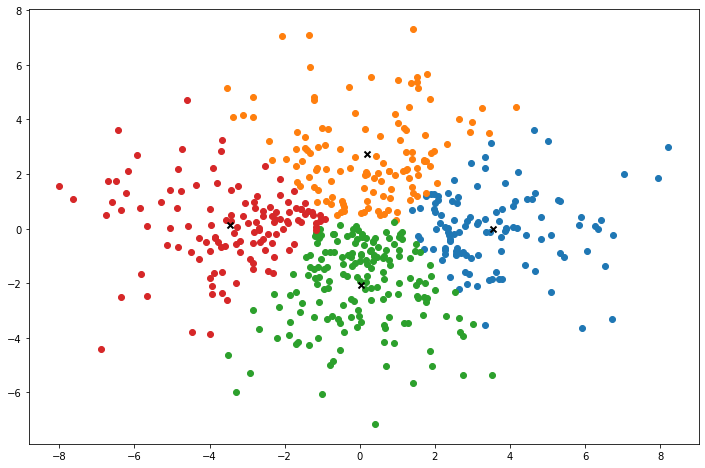

In [ ]:
if __name__ == "__main__":
  array = pca_data.to_numpy()
  k = KMeans(K=4, max_iters=150, plot_steps=True)
  y_pred = k.predict(array)

  k.plot()

In [ ]:
pca_data['cluster'] = y_pred
pca_data

,PCA_1,PCA_2,cluster
0,1.611241,-0.843757,2.0
1,4.089042,0.074447,0.0
2,0.658220,-1.838838,2.0
3,4.181095,0.031124,0.0
4,2.378687,-0.253166,0.0
...,...,...,...
522,-5.139851,-0.602025,3.0
523,-2.449418,-0.182212,3.0
524,-3.292510,-1.986531,3.0
525,-1.569626,0.227942,3.0


# **DBI Score**


In [ ]:
from sklearn.metrics import davies_bouldin_score
db_hasil = davies_bouldin_score(pca_data, y_pred)
print(db_hasil)

0.8475092543050304
